In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [6]:
h = titles
h.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


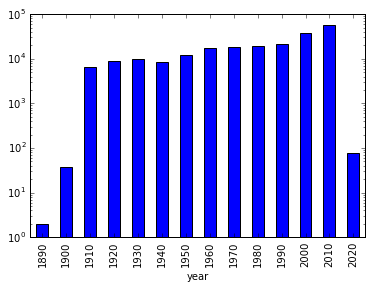

In [7]:
h.groupby(h.year//10*10).size().plot(kind='bar',logy=True)

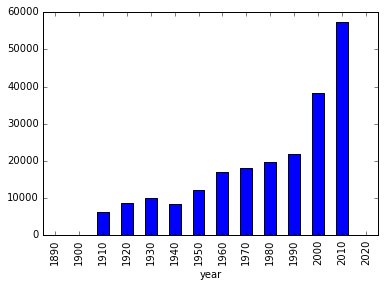

In [8]:
h.groupby(h.year//10*10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

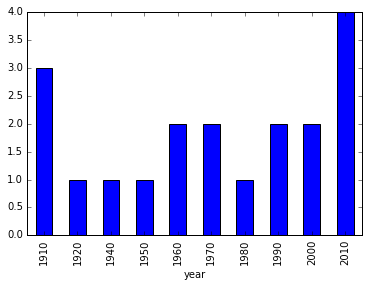

In [29]:
h=titles
h[h.title=='Hamlet'].groupby(h.year//10*10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [30]:
h = cast

In [66]:
h[(h.n==1) & (h.year < 1960) & (h.year>=1950)].set_index(['type',h.year]).groupby('year').size()


year
1950     883
1951     909
1952     877
1953     933
1954     927
1955     889
1956     918
1957    1001
1958     978
1959     986
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [75]:
h = cast

In [80]:
t = h[(h.n<5) & (h.year < 1960) & (h.year>=1950) ]
t[(t.type =='actor') | (t.type == 'actress')].groupby(['year','type']).size()


year  type   
1950  actor      2047
      actress    1251
1951  actor      2192
      actress    1234
1952  actor      2058
      actress    1277
1953  actor      2198
      actress    1323
1954  actor      2109
      actress    1283
1955  actor      2097
      actress    1277
1956  actor      2129
      actress    1298
1957  actor      2350
      actress    1409
1958  actor      2315
      actress    1384
1959  actor      2290
      actress    1407
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [160]:
h = cast
h[cast.title.str.startswith('The Pink Pan')].groupby(['title']).size()


title
The Pink Panther                  109
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [196]:
h = cast
t=h[cast.name=='Frank Oz'].title.value_counts()
t[t>1]

The Muppet Movie                            8
The Muppet Christmas Carol                  7
The Muppets Take Manhattan                  7
The Great Muppet Caper                      6
Muppets from Space                          4
Muppet Treasure Island                      4
The Adventures of Elmo in Grouchland        3
Sesame Street Presents: Follow that Bird    3
An American Werewolf in London              2
The Dark Crystal                            2
Name: title, dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [232]:
h = cast
t=h[cast.name=='Frank Oz'].character.value_counts()
t[t>1]

#test = (t.head().title.value_counts()>1)
#test

Yoda              6
Miss Piggy        6
Animal            6
Sam the Eagle     5
Fozzie Bear       4
Cookie Monster    3
Bert              3
Grover            2
Name: character, dtype: int64